In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('queue_stats_2018.csv')
df.head()

,QueueName,Date,Interval,Offered,Handled,AnswerAfterThreshold,Transfered,AbandonedTotal,AbandonedAfterThreshold,AbandonedShort,...,TotalShortAbandonedCalls,TotalAnswerPercent,TotalAbandonedAverage,TotalAverageTimeToAnswer,TotalAverageTalkTime,TotalAvarageWrapUpTime,TotalAverageWorkTime,TotalSLP,TotalMaxAnsweringTime,TotalMaxAbandonedTime
0,NaN,8/1/2018,Day,7,0,0,0,7,0,7,...,7,0.00,0:00:00,0:00:00,0:00:00,0:00:00,0:00:00,0.0,0:00:00,0:00:01
1,(No Queue Assigned),8/9/2018,Day,1,1,1,0,0,0,0,...,0,100.00,0:00:00,0:00:14,0:00:07,0:00:06,0:00:13,0.0,0:00:14,0:00:00
2,AR_Access_Control_EMEA,8/12/2018,Day,1,1,0,0,0,0,0,...,2,92.97,0:01:25,0:00:48,0:13:52,0:00:34,0:14:26,81.5,0:59:52,0:06:36
3,AR_Access_Control_EMEA,8/17/2018,Day,1,1,0,0,0,0,0,...,2,92.97,0:01:25,0:00:48,0:13:52,0:00:34,0:14:26,81.5,0:59:52,0:06:36
4,AR_Access_Control_EMEA,8/19/2018,Day,4,4,4,0,0,0,0,...,2,92.97,0:01:25,0:00:48,0:13:52,0:00:34,0:14:26,81.5,0:59:52,0:06:36


In [2]:
new_cols = ['QueueName','Date', 'Interval', 'Offered', 'Handled','AnswerAfterThreshold', 'Transfered', 'AbandonedTotal',
            'AbandonedAfterThreshold', 'AbandonedShort','GroupName']

In [3]:
#changing the date column into an datetime object 
df=df[new_cols]
df.head()
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
pol = df[(df['QueueName'] == 'PO_Access_Control_EMEA') | (df['QueueName'] == 'PO_EUS_EMEA')]

In [5]:
pol = pol[pol['GroupName']=='Hungary']

In [6]:
pol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 7592 to 8164
Data columns (total 11 columns):
QueueName                  206 non-null object
Date                       206 non-null datetime64[ns]
Interval                   206 non-null object
Offered                    206 non-null int64
Handled                    206 non-null int64
AnswerAfterThreshold       206 non-null int64
Transfered                 206 non-null int64
AbandonedTotal             206 non-null int64
AbandonedAfterThreshold    206 non-null int64
AbandonedShort             206 non-null int64
GroupName                  206 non-null object
dtypes: datetime64[ns](1), int64(7), object(3)
memory usage: 19.3+ KB


In [7]:
# setting the date as index
pol = pol.set_index('Date')


In [8]:
offered = pol['Offered']
handled = pol['Handled']

#.rolling(5).mean().plot()
#rolling = offered.rolling(5).mean()
#rolling
offered

Date
2018-08-01    37
2018-08-02    19
2018-08-03    60
2018-08-06    66
2018-08-07    38
2018-08-08    33
2018-08-09    29
2018-08-10    22
2018-08-13    24
2018-08-14    12
2018-08-15     5
2018-08-16    27
2018-08-17    10
2018-08-20    35
2018-08-21    24
2018-08-22    32
2018-08-23    34
2018-08-24    17
2018-08-27    34
2018-08-28    25
2018-08-29    18
2018-08-30    34
2018-08-31    34
2018-09-03    54
2018-09-04    51
2018-09-05    87
2018-09-06    53
2018-09-07    51
2018-09-10    34
2018-09-11    32
              ..
2018-11-13    24
2018-11-14    28
2018-11-15    22
2018-11-16    26
2018-11-19    36
2018-11-20    27
2018-11-21    28
2018-11-22    25
2018-11-23     8
2018-11-26    24
2018-11-27    35
2018-11-28    28
2018-11-29    23
2018-11-30    23
2018-12-03    30
2018-12-04    37
2018-12-05    35
2018-12-06    26
2018-12-07    14
2018-12-10    34
2018-12-11    21
2018-12-12    19
2018-12-13    24
2018-12-14    15
2018-12-17    18
2018-12-18    17
2018-12-19    13
2018-12-2

In [13]:
pol

,QueueName,Interval,Offered,Handled,AnswerAfterThreshold,Transfered,AbandonedTotal,AbandonedAfterThreshold,AbandonedShort,GroupName
Date,,,,,,,,,,
2018-08-01,PO_Access_Control_EMEA,Day,37,37,32,0,0,0,0,Hungary
2018-08-02,PO_Access_Control_EMEA,Day,19,19,17,0,0,0,0,Hungary
2018-08-03,PO_Access_Control_EMEA,Day,60,54,48,0,6,6,0,Hungary
2018-08-06,PO_Access_Control_EMEA,Day,66,34,30,0,32,32,0,Hungary
2018-08-07,PO_Access_Control_EMEA,Day,38,29,26,0,9,8,1,Hungary
2018-08-08,PO_Access_Control_EMEA,Day,33,21,17,0,12,12,0,Hungary
2018-08-09,PO_Access_Control_EMEA,Day,29,20,19,0,9,9,0,Hungary
2018-08-10,PO_Access_Control_EMEA,Day,22,18,18,0,4,3,1,Hungary
2018-08-13,PO_Access_Control_EMEA,Day,24,20,12,1,4,3,1,Hungary


Text(0,0.5,'volume')

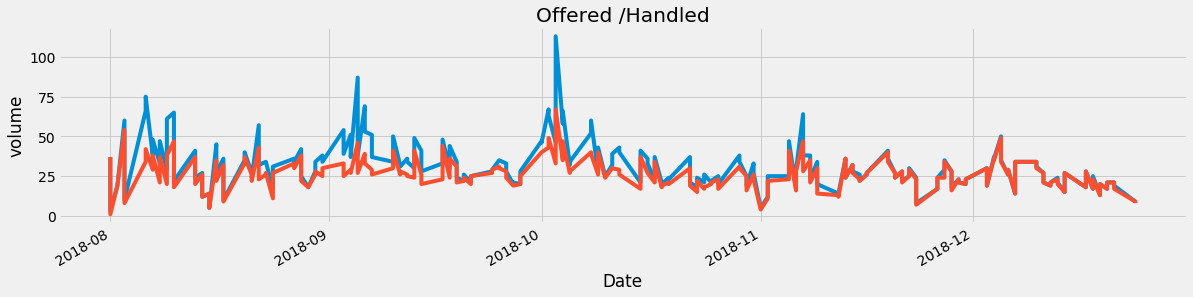

In [10]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(18,4))

offered.plot()
handled.plot()

plt.title('Offered /Handled')
plt.xlabel('Date')
plt.ylabel('volume')

Text(0,0.5,'volume')

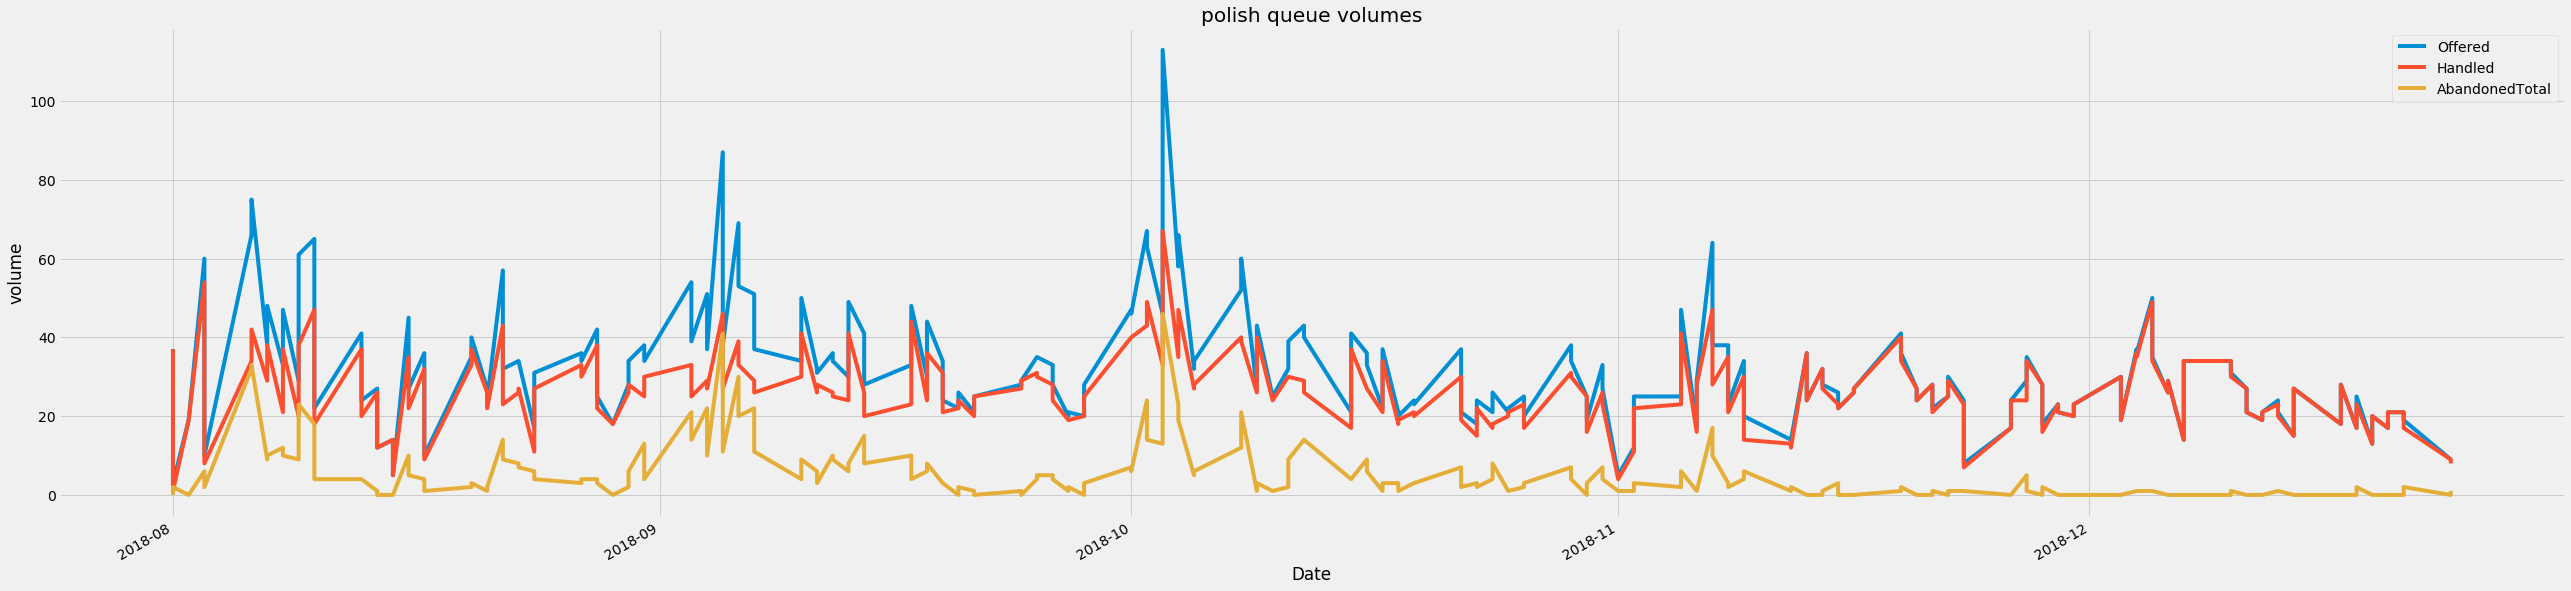

In [11]:
column_list = ['Offered', 'Handled', 'AbandonedTotal']
plt.style.use('fivethirtyeight')

pol[column_list].plot(figsize=(40, 10))
plt.title('polish queue volumes')
plt.xlabel('Date')
plt.ylabel('volume')



In [12]:
import statsmodels as sm
import seaborn as sns

In [16]:
#total calls offered, handled  since going live  - here values are selected by the dot notation - not brackets 
total_calls = pol.Offered.sum()
total_calls

6500

In [18]:
total_handled = pol.Handled.sum()
total_handled

5437

In [19]:
after_treshold = pol.AnswerAfterThreshold.sum()
after_treshold


4819

In [24]:
# selecting the  days that the  offered volume was more than  50 
busy_days = pol[pol['Offered'] > 50]
busy_days.info()
busy_days

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2018-08-03 to 2018-10-08
Data columns (total 10 columns):
QueueName                  20 non-null object
Interval                   20 non-null object
Offered                    20 non-null int64
Handled                    20 non-null int64
AnswerAfterThreshold       20 non-null int64
Transfered                 20 non-null int64
AbandonedTotal             20 non-null int64
AbandonedAfterThreshold    20 non-null int64
AbandonedShort             20 non-null int64
GroupName                  20 non-null object
dtypes: int64(7), object(3)
memory usage: 1.7+ KB


,QueueName,Interval,Offered,Handled,AnswerAfterThreshold,Transfered,AbandonedTotal,AbandonedAfterThreshold,AbandonedShort,GroupName
Date,,,,,,,,,,
2018-08-03,PO_Access_Control_EMEA,Day,60,54,48,0,6,6,0,Hungary
2018-08-06,PO_Access_Control_EMEA,Day,66,34,30,0,32,32,0,Hungary
2018-09-03,PO_Access_Control_EMEA,Day,54,33,29,0,21,20,1,Hungary
2018-09-04,PO_Access_Control_EMEA,Day,51,29,27,0,22,21,1,Hungary
2018-09-05,PO_Access_Control_EMEA,Day,87,46,46,0,41,39,2,Hungary
2018-09-06,PO_Access_Control_EMEA,Day,53,33,31,0,20,18,2,Hungary
2018-09-07,PO_Access_Control_EMEA,Day,51,29,26,0,22,22,0,Hungary
2018-10-02,PO_Access_Control_EMEA,Day,63,49,48,0,14,12,2,Hungary
2018-10-03,PO_Access_Control_EMEA,Day,113,67,66,0,46,42,4,Hungary
